In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas import read_csv, Series
import numpy as np
import scipy
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
def clean_and_read_adult(data_file="train"):
    try:
        f = open('adult_%s.csv' % data_file)
    except IOError:
        f = open('adult.%s' % data_file)
    lines = f.read().split('\n')
    w = open('adult_%s_clean.csv' % data_file, 'wb')
    w.write(lines[0]+'\n')
    for l in lines[1:]:
        w.write(','.join([_.strip() for _ in l.split(',')])+'\n')
    w.close()
    f.close()
    data = read_csv('adult_%s_clean.csv' % data_file)
    _class = data['salary'] == '>50K'
    data['class'] = Series(_class)
    return data

In [3]:
data_train = clean_and_read_adult('train')
data_test = clean_and_read_adult('test')

total_train = len(data_train)
total_test = len(data_test)

In [4]:
data_test.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'salary', u'class'],
      dtype='object')

<function matplotlib.pyplot.show>

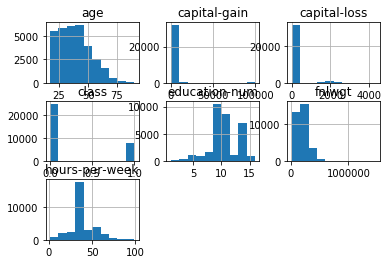

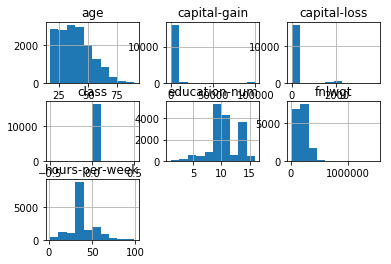

In [5]:
data_train.hist()
data_test.hist()
plt.show

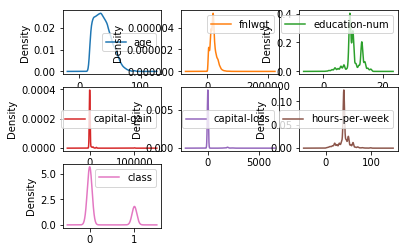

In [6]:
data_train.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [7]:
# count of people in train set less or greater than 45 years of age
print np.bincount(data_train['age']>45)

# count of people in test set less or greater than 45 years of age
print np.bincount(data_test['age']>45)

[22934  9627]
[11364  4917]


In [8]:
# race analysis
def stats_race(query_race='Black'):
    not_race, race = np.bincount(data_train['race'] == query_race)
    print not_race, race
    print race/float(total_train)
    assert not_race + race == len(data_train), "Error"
    race_less, race_more = np.bincount(data_train[data_train['race'] == query_race]['class'])
    assert race_less + race_more == race
    print race_more, race_less
    print race_more / float(race)

stats_race('White')
stats_race('Black')
stats_race('Other')

4745 27816
0.854273517398
7117 20699
0.255859936727
29437 3124
0.0959429992936
387 2737
0.123879641485
32290 271
0.00832284020761
25 246
0.0922509225092


In [9]:
# occupation analysis with race

query_occupation = 'Exec-managerial'
query_race = 'Black'

condition_race = data_train['race'] == query_race
condition_occupation = data_train['occupation'] == query_occupation
condition_more = data_train['class']

not_race, race = np.bincount(condition_race)
print "{} people belong to {}, {} people not {}".format(race, query_race, not_race, query_race)
print "Percent: ",race/float(total_train)

not_occupation, occupation = np.bincount(condition_occupation)
print "{0} people work as {2}, {1} people not {2}".format(occupation, not_occupation, query_occupation)
print "Percent: ",occupation/float(total_train)

occupation_race = data_train[condition_race & condition_occupation]

common_less, common_more = np.bincount(occupation_race['class'])
print common_less, common_more

3124 people belong to Black, 29437 people not Black
Percent:  0.0959429992936
4066 people work as Exec-managerial, 28495 people not Exec-managerial
Percent:  0.124873314702
160 84


In [10]:
a = data_train['race'] == 'Black'
b = data_train['occupation'] == 'Exec-managerial'

len(data_train[a & b])

244

In [11]:
# occupation analysis with race

query_occupation = 'Exec-managerial'
query_race = 'White'

condition_race = data_train['race'] == query_race
condition_occupation = data_train['occupation'] == query_occupation
condition_more = data_train['class']

np.bincount(data_train[condition_occupation & condition_race]['class'])

array([1828, 1818])

In [12]:
# gender analysis

query_gender = 'Female'
np.bincount(data_train[data_train['sex'] == query_gender]['occupation'] == 'Exec-managerial')

array([9612, 1159])

In [13]:
np.bincount(data_train[data_train['occupation'] == 'Exec-managerial']['sex'] == 'Male')

array([1159, 2907])

In [14]:
print np.bincount(data_train[data_train['marital-status'] == 'Divorced']['sex'] == 'Female')

[1771 2672]


In [15]:
np.bincount(data_train['occupation'] == 'Exec-managerial')

array([28495,  4066])

In [16]:
np.bincount((data_train['sex'] == 'Male') & (data_train['occupation'] == 'Armed-Forces'))

array([32552,     9])

In [17]:
def show_gender_occupation(query_sex='Male'):
    data_sex = data_train[data_train['sex'] == query_sex]
    data_sex['occupation'].hist(label=query_sex)

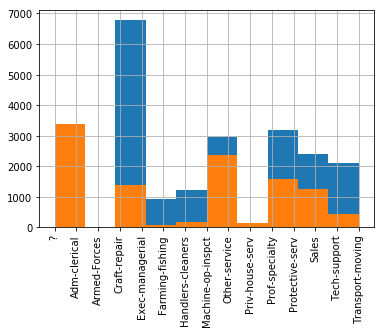

In [18]:
show_gender_occupation('Male')
show_gender_occupation('Female')
plt.xticks(rotation='vertical')
plt.show()

/Users/sivaramanks/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


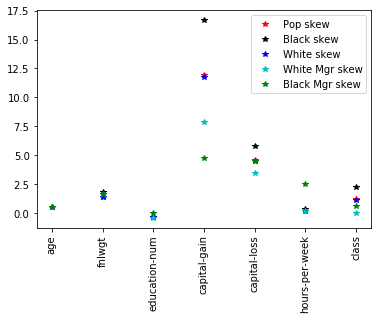

In [19]:
X = data_train.values
pop_skew = []
for i in range(X.shape[1]):
    try:
        pop_skew.append(scipy.stats.skew(X[:,i]))
    except TypeError:
        continue

X = data_train[data_train['race'] == 'White'].values
white_skew = []
for i in range(X.shape[1]):
    try:
        white_skew.append(scipy.stats.skew(X[:,i]))
    except TypeError:
        continue

X = data_train[data_train['race'] == 'Black'].values
black_skew = []
for i in range(X.shape[1]):
    try:
        black_skew.append(scipy.stats.skew(X[:,i]))
    except TypeError:
        continue

condition1 = data_train['race'] == 'Black'
condition2 = data_train['occupation'] == 'Exec-managerial'

X = data_train[condition1 & condition2].values
black_mgr_skew = []
for i in range(X.shape[1]):
    try:
        black_mgr_skew.append(scipy.stats.skew(X[:,i]))
    except TypeError:
        continue
        
condition1 = data_train['race'] == 'White'
condition2 = data_train['occupation'] == 'Exec-managerial'

X = data_train[condition1 & condition2].values
columns = data_train.columns
numeric_labels = []
white_mgr_skew = []
for i in range(X.shape[1]):
    try:
        white_mgr_skew.append(scipy.stats.skew(X[:,i]))
        numeric_labels.append(columns[i])
    except TypeError:
        continue

plt.plot(pop_skew, 'r*', label="Pop skew")
plt.plot(black_skew, 'k*', label="Black skew")
plt.plot(white_skew, 'b*', label="White skew")
plt.plot(white_mgr_skew, 'c*', label="White Mgr skew")
plt.plot(black_mgr_skew, 'g*', label="Black Mgr skew")
plt.legend()
plt.xticks(range(len(numeric_labels)), numeric_labels, rotation='vertical')
plt.show()

In [20]:
condition1 = data_train['age'] > 38
condition2 = data_train['sex'] == 'Female'

output = condition1 & condition2

scipy.stats.skew(data_train['class'])

1.2123743878187736

In [21]:
scipy.stats.skew(data_train[output]['class'])

1.8626017979997584

In [22]:
## do i need the two??

X_train = data_train.loc[:, data_train.columns != 'salary']
X_train = X_train.loc[:, X_train.columns != 'class']
Y = data_train['class']

In [23]:
model_rf = RF(n_estimators=100, n_jobs=-1)

In [24]:
print 'all', np.bincount(data_train['class'])
for race in data_train['race'].unique():
    query_race = data_train['race'] == race
    class_race = data_train[query_race]['class']
    print race, np.bincount(class_race)

all [24720  7841]
White [20699  7117]
Black [2737  387]
Asian-Pac-Islander [763 276]
Amer-Indian-Eskimo [275  36]
Other [246  25]


In [25]:
def get_distribution(distr_sample):
    type_a, type_b = np.bincount(distr_sample)
    total = float(len(distr_sample))
    return type_a/total, type_b/total

class_no_prior, class_yes_prior = get_distribution(data_train['class'])

original_black_no_prior, original_black_yes_prior = get_distribution(data_train[data_train['race'] == 'Black']['class'])

#class_no_prior, class_yes_prior

In [26]:
original_black_no_prior, original_black_yes_prior

(0.8761203585147247, 0.12387964148527529)

In [27]:
all_no, all_yes = np.bincount(data_train['class'])
black_no, black_yes = np.bincount(data_train[data_train['race'] == 'Black']['class'])

In [28]:
all_prior_no, all_prior_yes = get_distribution(data_train['class'])
black_prior_no, black_yes_prior = get_distribution(data_train[data_train['race'] == 'Black']['class'])

In [29]:
yes_over_no = all_yes/float(all_no)

In [30]:
no_over_yes = 1/yes_over_no

In [31]:
X_train = data_train.fillna(0).loc[:, data_train.columns != 'salary']
# set missing values to 0
#X[X == '?'] = 0
X_train = X_train.loc[:, X_train.columns != 'class'].values
Y_train = data_train['class'].values

In [32]:
X_train.shape, Y_train.shape

((32561, 14), (32561,))

In [33]:
# encode string input values as integers
def transform_train(X):
    label_attributes = {}
    encoded_x = None
    numeric_x = None
    for i in range(0, X.shape[1]):
        if type(X[0,i]) != str:
            if numeric_x is None:
                numeric_x = X[:,i].reshape(X.shape[0], 1)
                print numeric_x.shape

            else:
                numeric_x = np.concatenate((X[:,i].reshape(X.shape[0], 1), numeric_x), axis=1)
            continue
        label_encoder = LabelEncoder()
        feature = label_encoder.fit_transform(X[:,i])
        feature = feature.reshape(X.shape[0], 1)
        onehot_encoder = OneHotEncoder(sparse=False)
        feature = onehot_encoder.fit_transform(feature)
        label_attributes[i] = {'label_encoder': label_encoder, 'onehot_encoder': onehot_encoder}
        if encoded_x is None:
            encoded_x = feature
        else:
            encoded_x = np.concatenate((encoded_x, feature), axis=1)
    print("encoded X shape: : ", encoded_x.shape)
    print("numericX shape: : ", numeric_x.shape)
    X_ = np.concatenate((numeric_x, encoded_x), axis=1)
    print("Final Shape:", X_.shape)
    return X_, label_attributes

def transform_test(X, label_attributes):
    encoded_x = None
    numeric_x = None
    for i in range(0, X.shape[1]):
        if type(X[0,i]) != str:
            if numeric_x is None:
                numeric_x = X[:,i].reshape(X.shape[0], 1)
                print numeric_x.shape

            else:
                numeric_x = np.concatenate((X[:,i].reshape(X.shape[0], 1), numeric_x), axis=1)
            continue
        label_encoder = label_attributes[i]['label_encoder']
        feature = label_encoder.transform(X[:,i])
        feature = feature.reshape(X.shape[0], 1)
        onehot_encoder = label_attributes[i]['onehot_encoder']
        feature = onehot_encoder.transform(feature)
        if encoded_x is None:
            encoded_x = feature
        else:
            encoded_x = np.concatenate((encoded_x, feature), axis=1)
    print("encoded X shape: : ", encoded_x.shape)
    print("numericX shape: : ", numeric_x.shape)
    X_ = np.concatenate((numeric_x, encoded_x), axis=1)
    print("Final Shape:", X_.shape)
    return X_

In [34]:
X_train_transformed, label_attributes = transform_train(X_train)

(32561, 1)
('encoded X shape: : ', (32561, 102))
('numericX shape: : ', (32561, 6))
('Final Shape:', (32561, 108))


In [35]:
model_rf = RF(n_estimators=100)

In [36]:
model_rf.fit(X_train_transformed,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
pred_rf = model_rf.predict(X_train_transformed)

In [38]:
np.bincount(pred_rf == Y_train)

array([    1, 32560])

In [39]:
X_test = data_test.fillna(0).loc[:, data_test.columns != 'salary']
# set missing values to 0
#X[X == '?'] = 0
X_test = X_test.loc[:, X_test.columns != 'class'].values
Y_test = data_test['class'].values

In [40]:
X_test_transformed = transform_test(X_test, label_attributes)

(16281, 1)
('encoded X shape: : ', (16281, 102))
('numericX shape: : ', (16281, 6))
('Final Shape:', (16281, 108))


In [41]:
pred_rf_test = model_rf.predict(X_test_transformed)

In [42]:
np.bincount(pred_rf_test == Y_test)

array([ 3279, 13002])

In [43]:
## after deskewing it

In [44]:
##races_prior = {'all': {'no': class_no_prior, 'yes':class_yes_prior}}
races_prior = {}
for race in data_train['race'].unique():
    no, yes = get_distribution(data_train[data_train['race'] == race]['class'])
    races_prior[race] = {'no_prior':no, 'yes_prior':yes}

In [45]:
## Correlates directly with skew values
races_prior

{'Amer-Indian-Eskimo': {'no_prior': 0.88424437299035374,
  'yes_prior': 0.1157556270096463},
 'Asian-Pac-Islander': {'no_prior': 0.73435996150144367,
  'yes_prior': 0.26564003849855633},
 'Black': {'no_prior': 0.8761203585147247, 'yes_prior': 0.12387964148527529},
 'Other': {'no_prior': 0.90774907749077494, 'yes_prior': 0.092250922509225092},
 'White': {'no_prior': 0.74414006327293647, 'yes_prior': 0.25585993672706359}}

In [46]:
### Main Deskewing Routine

data = data_train
new_X = None
_sum = 0
for race in races_prior:
    print race, races_prior[race]['no_prior'],
    if races_prior[race]['no_prior'] >= class_no_prior:
        race_yes_index = data.index[(data['race'] == race) & (data['class'] == True)].tolist()
        race_no_index = data.index[(data['race'] == race) & (data['class'] == False)]
        race_no_index = np.random.choice(race_no_index,
                                         int(no_over_yes*len(race_yes_index)), replace=False).tolist()
    else:
        race_no_index = data.index[(data['race'] == race) & (data['class'] == False)].tolist()
        race_yes_index = data.index[(data['race'] == race) & (data['class'] == True)]
        race_yes_index = np.random.choice(race_yes_index,
                                          int(yes_over_no*len(race_no_index)), replace=False).tolist()
    print len(race_no_index)/ float(len(race_yes_index)+len(race_no_index))
    _sum += len(race_no_index + race_yes_index)
    ##print data.loc[race_no_index+race_yes_index,['race', 'class']]
    ##raw_input()
    if new_X is None:
        new_X = X_train_transformed[race_no_index + race_yes_index]
        new_Y = Y[race_no_index + race_yes_index]
    else:
        new_X = np.concatenate((new_X, X_train_transformed[race_no_index + race_yes_index]), axis=0)
        new_Y = np.concatenate((new_Y, Y[race_no_index + race_yes_index]), axis=0)
print total_train
print _sum

Asian-Pac-Islander 0.734359961501 0.7592039801
Amer-Indian-Eskimo 0.88424437299 0.758389261745
White 0.744140063273 0.759206279343
Other 0.907749077491 0.757281553398
Black 0.876120358515 0.759178593653
32561
30128


In [47]:
new_X.shape

(30128, 108)

In [48]:
model_deskew = RF(n_estimators=100, n_jobs=-1)
model_deskew.fit(new_X, new_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [49]:
pred_rf_deskew = model_deskew.predict(X_train_transformed)

In [50]:
np.bincount(pred_rf_deskew == Y_train)

array([  346, 32215])

In [51]:
pred_rf_deskew_test = model_deskew.predict(X_test_transformed)

In [52]:
np.bincount(pred_rf_deskew_test == Y_test)

array([ 3198, 13083])

In [53]:
feature = data_test['race']

In [54]:
mask = feature == 'White'

In [55]:
np.bincount(mask)

array([ 2335, 13946])

In [56]:
data_test[mask]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,class
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,False
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,False
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,False
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.,False
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.,False
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.,False
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K.,False
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K.,False
12,26,Private,82091,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,39,United-States,<=50K.,False
